In [58]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras import regularizers
import nltk
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

films = pd.read_csv('C:\\Users\\48516\\Desktop\\Studia\\AIKE\\FilmsGenres\\wiki_movie_plots_deduped.csv')
films.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [6]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [59]:
films = films[['Plot', 'Genre']]
films.drop(films[films['Genre'] == 'unknown'].index, inplace = True)
films.reset_index(drop = True, inplace = True)
films.head()

,Plot,Genre
0,The film opens with two bandits breaking into ...,western
1,The film is about a family who move to the sub...,comedy
2,The Rarebit Fiend gorges on Welsh rarebit at a...,short
3,The film features a train traveling through th...,short action/crime western
4,Irish villager Kathleen is a tenant of Captain...,short film


In [8]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28803 entries, 0 to 28802
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Plot    28803 non-null  object
 1   Genre   28803 non-null  object
dtypes: object(2)
memory usage: 450.2+ KB


In [9]:
films['Genre'].describe()

count     28803
unique     2264
top       drama
freq       5964
Name: Genre, dtype: object

In [60]:
mostFrequentGenres = films['Genre'].value_counts()[:10]
genresList = mostFrequentGenres.index.tolist()
print(mostFrequentGenres.sort_values(ascending = False))

drama        5964
comedy       4379
horror       1167
action       1098
thriller      966
romance       923
western       865
crime         568
adventure     526
musical       467
Name: Genre, dtype: int64


In [61]:
filmsFrequent = films[films['Genre'].isin(genresList)]
filmsFrequent.describe()

,Plot,Genre
count,16923,16923
unique,16783,10
top,The plot revolves around the players on a hock...,drama
freq,4,5964


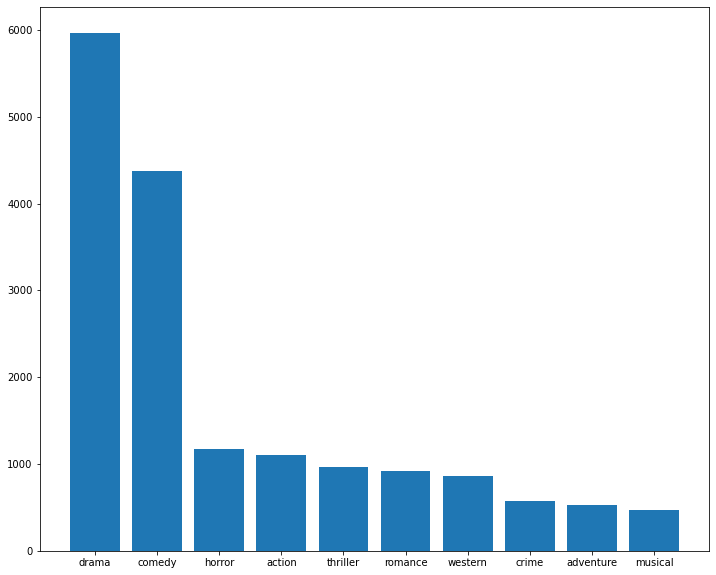

In [9]:
from matplotlib import pyplot as plt

plt.figure(figsize = [12, 10])
plt.bar(genresList, mostFrequentGenres)
plt.show()

In [10]:
filmsFrequent.head()

,Plot,Genre
0,The film opens with two bandits breaking into ...,western
1,The film is about a family who move to the sub...,comedy
6,Before heading out to a baseball game at a nea...,comedy
7,The plot is that of a black woman going to the...,comedy
8,On a beautiful summer day a father and mother ...,drama


In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\48516\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
def processPlot(plot):
    plot = re.sub(r'[^a-zA-Z]', ' ', plot)
    tokens = nltk.word_tokenize(plot)
    tokens = [token.lower() for token in tokens]
    porter = nltk.PorterStemmer()
    stems = [porter.stem(token) for token in tokens]
    return stems

In [14]:
print(processPlot(filmsFrequent.iloc[0, 0]))

['the', 'film', 'open', 'with', 'two', 'bandit', 'break', 'into', 'a', 'railroad', 'telegraph', 'offic', 'where', 'they', 'forc', 'the', 'oper', 'at', 'gunpoint', 'to', 'have', 'a', 'train', 'stop', 'and', 'to', 'transmit', 'order', 'for', 'the', 'engin', 'to', 'fill', 'the', 'locomot', 's', 'tender', 'at', 'the', 'station', 's', 'water', 'tank', 'they', 'then', 'knock', 'the', 'oper', 'out', 'and', 'tie', 'him', 'up', 'as', 'the', 'train', 'stop', 'it', 'is', 'board', 'by', 'the', 'bandit', 'now', 'four', 'two', 'bandit', 'enter', 'an', 'express', 'car', 'kill', 'a', 'messeng', 'and', 'open', 'a', 'box', 'of', 'valuabl', 'with', 'dynamit', 'the', 'other', 'kill', 'the', 'fireman', 'and', 'forc', 'the', 'engin', 'to', 'halt', 'the', 'train', 'and', 'disconnect', 'the', 'locomot', 'the', 'bandit', 'then', 'forc', 'the', 'passeng', 'off', 'the', 'train', 'and', 'rifl', 'them', 'for', 'their', 'belong', 'one', 'passeng', 'tri', 'to', 'escap', 'but', 'is', 'instantli', 'shot', 'down', 'car

In [15]:
X = filmsFrequent['Plot'].values
y = filmsFrequent['Genre'].values

encoder = LabelEncoder()
y = encoder.fit_transform(y)
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3)

vectorizer = CountVectorizer(tokenizer = processPlot, lowercase = True, stop_words = 'english', max_features = 20000)
XTrain = vectorizer.fit_transform(XTrain).toarray()
XTest = vectorizer.fit_transform(XTest).toarray()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warni

In [16]:
XTrain.shape

(11846, 20000)

In [17]:
print(XTrain.shape, XTest.shape, yTrain.shape, yTest.shape)

(11846, 20000) (5077, 20000) (11846,) (5077,)


In [18]:
modelMLP1 = Sequential()
modelMLP1.add(layers.Dense(16, activation = 'relu', input_dim = 20000, kernel_regularizer = regularizers.l2(0.1)))
modelMLP1.add(layers.Dropout(0.5))
modelMLP1.add(layers.Dense(16, activation = 'relu', kernel_regularizer = regularizers.l2(0.1)))
modelMLP1.add(layers.Dropout(0.5))
modelMLP1.add(layers.Dense(10, activation = 'softmax'))
modelMLP1.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers.RMSprop(lr = 0.01), metrics = 'acc')
history1 = modelMLP1.fit(XTrain, yTrain, epochs = 20, validation_data = (XTest, yTest))

Epoch 1/20
371/371 [==============================] - 3s 8ms/step - loss: 3.3249 - acc: 0.3362 - val_loss: 2.7505 - val_acc: 0.3520
Epoch 2/20
371/371 [==============================] - 2s 6ms/step - loss: 2.7513 - acc: 0.3568 - val_loss: 2.6320 - val_acc: 0.3520
Epoch 3/20
371/371 [==============================] - 2s 6ms/step - loss: 2.7167 - acc: 0.3533 - val_loss: 2.6684 - val_acc: 0.3520
Epoch 4/20
371/371 [==============================] - 2s 6ms/step - loss: 2.6947 - acc: 0.3536 - val_loss: 2.6616 - val_acc: 0.3520
Epoch 5/20
371/371 [==============================] - 2s 6ms/step - loss: 2.6700 - acc: 0.3587 - val_loss: 2.6670 - val_acc: 0.3520
Epoch 6/20
371/371 [==============================] - 2s 6ms/step - loss: 2.6761 - acc: 0.3526 - val_loss: 2.6704 - val_acc: 0.3520
Epoch 7/20
371/371 [==============================] - 2s 6ms/step - loss: 2.6795 - acc: 0.3470 - val_loss: 2.6704 - val_acc: 0.3520
Epoch 8/20
371/371 [==============================] - 2s 6ms/step - loss: 2.

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
yPred = modelMLP1.predict(XTest)
print(confusion_matrix(yTest, yPred.argmax(axis = 1)))

[[   0    0    0    0  324    0    0    0    0    0]
 [   0    0    0    0  169    0    0    0    0    0]
 [   0    0    0    0 1328    0    0    0    0    0]
 [   0    0    0    0  159    0    0    0    0    0]
 [   0    0    0    0 1787    0    0    0    0    0]
 [   0    0    0    0  353    0    0    0    0    0]
 [   0    0    0    0  126    0    0    0    0    0]
 [   0    0    0    0  280    0    0    0    0    0]
 [   0    0    0    0  290    0    0    0    0    0]
 [   0    0    0    0  261    0    0    0    0    0]]


In [132]:
filmsMusical = filmsFrequent[filmsFrequent['Genre'] == 'musical']
filmsMusical.shape[0]

467

In [133]:
from sklearn.utils import resample

filmsDrama = filmsFrequent[filmsFrequent['Genre'] == 'drama'].sample(467)
filmsComedy = filmsFrequent[filmsFrequent['Genre'] == 'comedy'].sample(467)
filmsHorror = filmsFrequent[filmsFrequent['Genre'] == 'horror'].sample(467)
filmsAction = filmsFrequent[filmsFrequent['Genre'] == 'action'].sample(467)
filmsThriller = filmsFrequent[filmsFrequent['Genre'] == 'thriller'].sample(467)
filmsRomance = filmsFrequent[filmsFrequent['Genre'] == 'romance'].sample(467)
filmsWestern = filmsFrequent[filmsFrequent['Genre'] == 'western'].sample(467)
filmsCrime = filmsFrequent[filmsFrequent['Genre'] == 'crime'].sample(467)
filmsAdventure = filmsFrequent[filmsFrequent['Genre'] == 'adventure'].sample(467)
filmsUnder = pd.concat([filmsDrama, filmsComedy, filmsHorror, filmsAction, filmsThriller, filmsRomance, filmsWestern,
                       filmsCrime, filmsAdventure, filmsMusical])
filmsUnder = filmsUnder.sample(frac = 1).reset_index(drop = True)
print(filmsUnder['Genre'].value_counts().sort_values(ascending = False))

adventure    467
crime        467
musical      467
romance      467
horror       467
action       467
comedy       467
western      467
drama        467
thriller     467
Name: Genre, dtype: int64


In [134]:
X = filmsUnder['Plot'].values
y = filmsUnder['Genre'].values
encoder = LabelEncoder()
y = encoder.fit_transform(y)
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3)
vectorizer = CountVectorizer(lowercase = True, stop_words = 'english', max_features = 250)
XTrain = vectorizer.fit_transform(XTrain).toarray()
XTest = vectorizer.fit_transform(XTest).toarray()

In [135]:
print(XTrain.shape, XTest.shape, yTrain.shape, yTest.shape)

(3269, 250) (1401, 250) (3269,) (1401,)


In [137]:
modelMLP2 = Sequential()
modelMLP2.add(layers.Dense(8, activation = 'relu', input_dim = 250, kernel_regularizer = regularizers.l2(0.1)))
modelMLP2.add(layers.Dropout(0.5))
modelMLP2.add(layers.Dense(10, activation = 'softmax'))
modelMLP2.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers.SGD(lr = 0.1), metrics = 'acc')
history2 = modelMLP2.fit(XTrain, yTrain, epochs = 20, validation_data = (XTest, yTest), batch_size = 100)

Epoch 1/20
33/33 [==============================] - 0s 5ms/step - loss: 3.5787 - acc: 0.0942 - val_loss: 2.7081 - val_acc: 0.1035
Epoch 2/20
33/33 [==============================] - 0s 2ms/step - loss: 2.5920 - acc: 0.1120 - val_loss: 2.4255 - val_acc: 0.0906
Epoch 3/20
33/33 [==============================] - 0s 2ms/step - loss: 2.3486 - acc: 0.1470 - val_loss: 2.3542 - val_acc: 0.1085
Epoch 4/20
33/33 [==============================] - 0s 2ms/step - loss: 2.2638 - acc: 0.1857 - val_loss: 2.3571 - val_acc: 0.1056
Epoch 5/20
33/33 [==============================] - 0s 2ms/step - loss: 2.2183 - acc: 0.2198 - val_loss: 2.3646 - val_acc: 0.1113
Epoch 6/20
33/33 [==============================] - 0s 2ms/step - loss: 2.1943 - acc: 0.2334 - val_loss: 2.3689 - val_acc: 0.1221
Epoch 7/20
33/33 [==============================] - 0s 2ms/step - loss: 2.1802 - acc: 0.2296 - val_loss: 2.3743 - val_acc: 0.1256
Epoch 8/20
33/33 [==============================] - 0s 2ms/step - loss: 2.1698 - acc: 0.24

In [138]:
from sklearn.metrics import classification_report, confusion_matrix

yPred = modelMLP2.predict(XTest)
print(confusion_matrix(yTest, yPred.argmax(axis = 1)))

[[14 13  2  2 31 10 10 14 10 26]
 [13 14  2  6 43 11 12 16  7 30]
 [ 6 16  3  5 42  9 17 13  7 30]
 [ 6 10  2  7 42  8 25  5  5 31]
 [ 6 10  3  7 36  9 14 11  3 20]
 [ 7 27  4  1 27 30 10 20  4 15]
 [ 7 14  3  9 34 17 16  3  5 40]
 [ 5 21  0  4 40  6 13 13  3 31]
 [ 7  9  5  7 35 22 25 12  9 17]
 [ 6 11  5  2 38  6 18 12  3 29]]


In [62]:
from keras.backend import clear_session
clear_session()

In [63]:
filmsDrama = filmsFrequent[filmsFrequent['Genre'] == 'drama'].sample(5000, replace = True)
filmsComedy = filmsFrequent[filmsFrequent['Genre'] == 'comedy'].sample(5000, replace = True)
filmsHorror = filmsFrequent[filmsFrequent['Genre'] == 'horror'].sample(5000, replace = True)
filmsAction = filmsFrequent[filmsFrequent['Genre'] == 'action'].sample(5000, replace = True)
filmsThriller = filmsFrequent[filmsFrequent['Genre'] == 'thriller'].sample(5000, replace = True)
filmsRomance = filmsFrequent[filmsFrequent['Genre'] == 'romance'].sample(5000, replace = True)
filmsWestern = filmsFrequent[filmsFrequent['Genre'] == 'western'].sample(5000, replace = True)
filmsCrime = filmsFrequent[filmsFrequent['Genre'] == 'crime'].sample(5000, replace = True)
filmsAdventure = filmsFrequent[filmsFrequent['Genre'] == 'adventure'].sample(5000, replace = True)
filmsMusical = filmsFrequent[filmsFrequent['Genre'] == 'musical'].sample(5000, replace = True)
filmsOver = pd.concat([filmsDrama, filmsComedy, filmsHorror, filmsAction, filmsThriller, filmsRomance, filmsWestern,
                       filmsCrime, filmsAdventure, filmsMusical])
filmsOver = filmsOver.sample(frac = 1).reset_index(drop = True)
print(filmsOver['Genre'].value_counts().sort_values(ascending = False))

western      5000
thriller     5000
action       5000
drama        5000
comedy       5000
musical      5000
romance      5000
adventure    5000
horror       5000
crime        5000
Name: Genre, dtype: int64


In [115]:
X = filmsOver['Plot'].values
y = filmsOver['Genre'].values
encoder = LabelEncoder()
y = encoder.fit_transform(y)
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.1)

In [116]:
vectorizer = CountVectorizer(lowercase = True, stop_words = 'english', max_features = 100)
XTrain = vectorizer.fit_transform(XTrain).toarray()
XTest = vectorizer.fit_transform(XTest).toarray()

In [117]:
print(XTrain.shape, XTest.shape, yTrain.shape, yTest.shape)

(45000, 100) (5000, 100) (45000,) (5000,)


In [118]:
modelMLP3 = Sequential()
modelMLP3.add(layers.Dense(8, activation = 'relu', input_dim = 100, kernel_regularizer = regularizers.l2(0.1)))
modelMLP3.add(layers.Dropout(0.5))
modelMLP3.add(layers.Dense(10, activation = 'softmax'))
modelMLP3.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers.RMSprop(lr = 0.001), metrics = 'acc')
history3 = modelMLP3.fit(XTrain, yTrain, epochs = 40, validation_data = (XTest, yTest), batch_size = 100)

Epoch 1/40
450/450 [==============================] - 1s 822us/step - loss: 2.9309 - acc: 0.1227 - val_loss: 2.2624 - val_acc: 0.1808
Epoch 2/40
450/450 [==============================] - 0s 679us/step - loss: 2.1890 - acc: 0.2097 - val_loss: 2.2342 - val_acc: 0.2114
Epoch 3/40
450/450 [==============================] - 0s 597us/step - loss: 2.1442 - acc: 0.2258 - val_loss: 2.2142 - val_acc: 0.2160
Epoch 4/40
450/450 [==============================] - 0s 583us/step - loss: 2.1181 - acc: 0.2325 - val_loss: 2.2175 - val_acc: 0.2100
Epoch 5/40
450/450 [==============================] - 0s 631us/step - loss: 2.1000 - acc: 0.2455 - val_loss: 2.2062 - val_acc: 0.2096
Epoch 6/40
450/450 [==============================] - 0s 640us/step - loss: 2.0896 - acc: 0.2550 - val_loss: 2.1976 - val_acc: 0.2110
Epoch 7/40
450/450 [==============================] - 0s 594us/step - loss: 2.0789 - acc: 0.2570 - val_loss: 2.1968 - val_acc: 0.2128
Epoch 8/40
450/450 [==============================] - 0s 583us

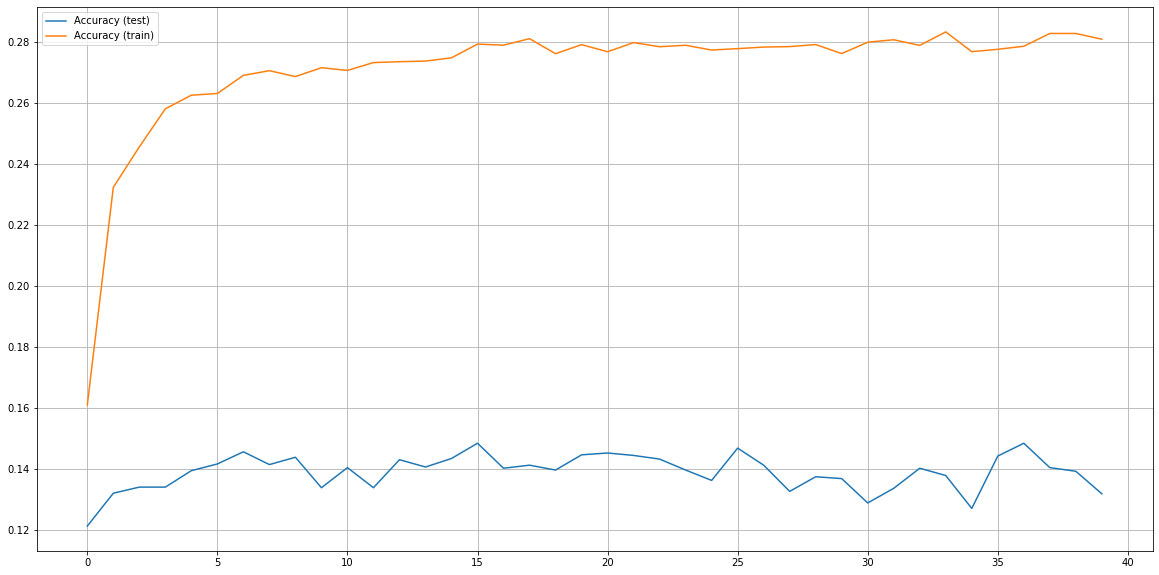

In [110]:
from matplotlib import pyplot as plt
plt.figure(figsize = [20, 10])
plt.plot(history3.history['val_acc'], label = 'Accuracy (test)')
plt.plot(history3.history['acc'], label = 'Accuracy (train)')
plt.grid()
plt.legend()
plt.show()

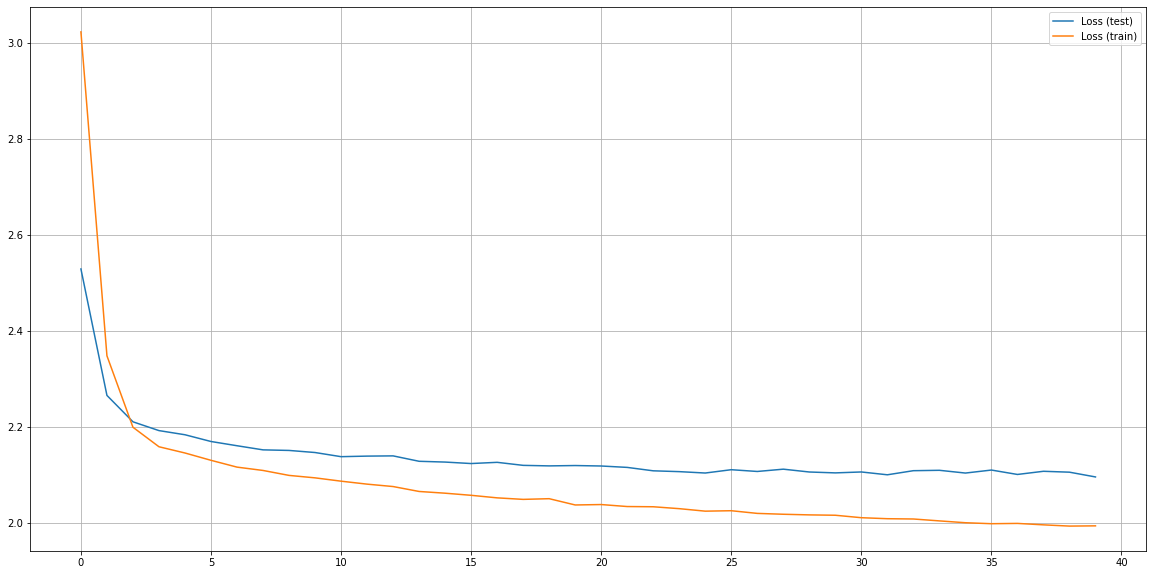

In [42]:
plt.figure(figsize = [20, 10])
plt.plot(history3.history['val_loss'], label = 'Loss (test)')
plt.plot(history3.history['loss'], label = 'Loss (train)')
plt.grid()
plt.legend()
plt.show()

In [125]:
modelMLP3.save('C:\\Users\\48516\\Desktop\\Studia\\AIKE\\FilmsGenres\\mlp3_2.h5')